<a href="https://colab.research.google.com/github/Rishabg24/Calculator-/blob/main/Bungee_Drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

In [ ]:
#@title Weird code
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("bungdrp table test.csv")
x = data['Mass'].values
y = data['Drop_Height'].values
z = data['Cord_Length'].values

# Define the cubic function to fit
# def model_func(xy, a, b, c, d, e, f, g, h, i, j):
#     x, y = xy
#     return a*x**3 + b*(x**2)*y + c*x*(y**2) + d*(y**3) + e*(x**2) + f*x*y + g*(y**2) + h*x + i*y + j

def model_func(xy, a, b, c, d, e, f):
    x, y = xy
    return a*(x**2) + b*x*y + c*(y**2) + d*x + e*y + f


# Stack x and y for fitting
xy_data = np.vstack((x, y))
params, _ = curve_fit(model_func, xy_data, z)

# Extract fitted parameters
# a, b, c, d, e, f, g, h, i, j = params
a, b, c, d, e, f = params
print(f"Fitted equation: z = {a:.5f}x^3 + {b:.5f}x^2y + {c:.5f}xy^2 + {d:.5f}y^3 + {e:.5f}x^2 + "
      f"{f:.5f}xy + {g:.5f}y^2 + {h:.5f}x + {i:.5f}y + {j:.5f}")

# Visualize the original data and fitted surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, color='blue', label='Original Data')

# Predicted values
z_pred = model_func((x, y), *params)

# R² calculation
ss_total = np.sum((z - np.mean(z))**2)  # Total sum of squares
ss_residual = np.sum((z - z_pred)**2)   # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)
print(f"R²: {r_squared:.3f}")

# Create a grid for the surface
x_grid = np.linspace(min(x), max(x), 50)
y_grid = np.linspace(min(y), max(y), 50)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
z_mesh = model_func((x_mesh, y_mesh), *params)

# Plot the surface
ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.5, cmap='viridis')
ax.set_xlabel('Mass (g)')
ax.set_ylabel('Drop Height (cm)')
ax.set_zlabel('Cord Length (cm)')

# Add legend
ax.legend()
plt.show()

Fitted equation: z = 0.00004x^2 + 0.00001xy + 0.00013y^2 + -0.01506x + -0.10435y + 22.00532
R²: 0.006


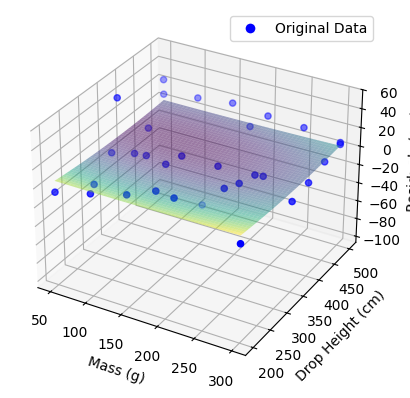

In [ ]:
#@title Residuals Code


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data
data = pd.read_csv("ResidualsGraphing.csv")
x = data['Mass'].values
y = data['Drop_Height'].values
z = data['Residuals'].values

# Define the quadratic function to fit
def model_func(xy, a, b, c, d, e, f):
    x, y = xy
    return a * (x**2) + b * x * y + c * (y**2) + d * x + e * y + f

# Stack x and y as required by curve_fit
xy_data = np.vstack((x, y))

# Perform curve fitting
params, _ = curve_fit(model_func, xy_data, z)

# Unpack the fitted parameters
a, b, c, d, e, f = params
print(f"Fitted equation: z = {a:.5f}x^2 + {b:.5f}xy + {c:.5f}y^2 + {d:.5f}x + {e:.5f}y + {f:.5f}")

# Visualize the original data and fitted surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue', label='Original Data')

# Predicted values
z_pred = model_func((x, y), *params)

# R² calculation
ss_total = np.sum((z - np.mean(z))**2)  # Total sum of squares
ss_residual = np.sum((z - z_pred)**2)   # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)
print(f"R²: {r_squared:.3f}")

# Create a grid for the surface
x_grid = np.linspace(min(x), max(x), 50)
y_grid = np.linspace(min(y), max(y), 50)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
z_mesh = model_func((x_mesh, y_mesh), *params)

# Plot the surface
ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.5, cmap='viridis')
ax.set_xlabel('Mass (g)')
ax.set_ylabel('Drop Height (cm)')
ax.set_zlabel('Residuals (cm)')

scatter_legend = plt.Line2D([0], [0], marker='o', color='w', label='Original Data', markerfacecolor='blue', markersize=8)
plt.legend(handles=[scatter_legend], loc='best')

plt.show()


Fitted equation: z = 0.00144x^2 + -0.00124xy + -0.00008y^2 + -0.45887x + 0.92831y + 4.99952
R²: 0.950


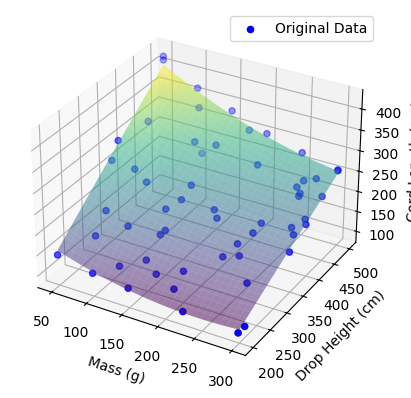

In [ ]:
# Load the data
data = pd.read_csv("bungdrp table test.csv")  # Replace with your CSV file
x = data['Mass'].values
y = data['Drop_Height'].values
z = data['Cord_Length'].values

# Define the quadratic model function
def model_func(xy, a, b, c, d, e, f):
    x, y = xy
    return a * (x**2) + b * x * y + c * (y**2) + d * x + e * y + f

# def model_func(xy, a, b, c, d, e, f, g, h, i, j):
#     x, y = xy
#     return (
#         a * (x**3) + b * (x**2) * y + c * x * (y**2) + d * (y**3) +
#         e * (x**2) + f * x * y + g * (y**2) + h * x + i * y + j
#     )

# Define the residuals function
def residuals(params, xy_data, z_actual):
    x, y = xy_data
    z_pred = model_func((x, y), *params)
    return z_actual - z_pred

# Regularized residuals to prevent overfitting
def regularized_residuals(params, xy_data, z_actual, alpha=0.1):
    x, y = xy_data
    z_pred = model_func((x, y), *params)
    regularization = alpha * np.sum(np.array(params)**2)  # L2 regularization term
    return z_actual - z_pred + regularization

# Prepare the input data for fitting
xy_data = np.vstack((x, y))

# Initial guess for parameters
initial_guess = [1, 1, 1, 1, 1, 1]

# initial_guess = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Perform least-squares fitting with regularization
result = least_squares(regularized_residuals, initial_guess, args=(xy_data, z))
params = result.x

# Extract fitted parameters
a, b, c, d, e, f = params
print(f"Fitted equation: z = {a:.5f}x^2 + {b:.5f}xy + {c:.5f}y^2 + {d:.5f}x + {e:.5f}y + {f:.5f}")

# a, b, c, d, e, f, g, h, i, j = params
# print(
#     f"Fitted equation: z = {a:.5f}x^3 + {b:.5f}x^2y + {c:.5f}xy^2 + {d:.5f}y^3 + "
#     f"{e:.5f}x^2 + {f:.5f}xy + {g:.5f}y^2 + {h:.5f}x + {i:.5f}y + {j:.5f}"
# )

# Calculate predictions and clip negative values
z_pred = model_func((x, y), *params)
z_pred_clipped = np.clip(z_pred, 0, None)

# Calculate R² value
ss_total = np.sum((z - np.mean(z))**2)
ss_residual = np.sum((z - z_pred_clipped)**2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R²: {r_squared:.3f}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, color='blue', label='Original Data')

x_grid = np.linspace(min(x), max(x), 30)
y_grid = np.linspace(min(y), max(y), 30)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
z_mesh = model_func((x_mesh, y_mesh), *params)
z_mesh_clipped = np.clip(z_mesh, 0, None)


ax.plot_surface(x_mesh, y_mesh, z_mesh_clipped, alpha=0.5, cmap='viridis')

ax.set_xlabel('Mass (g)')
ax.set_ylabel('Drop Height (cm)')
ax.set_zlabel('Cord Length (cm)')


ax.legend()
plt.show()


In [ ]:
#@title Making nonesene stuff
def Calculate(x,y):
  # x in grams. y in cm
  z = 0.00169*x**2 + -0.00125*x*y + -0.00012*y**2 + -0.54226*x + 0.96189*y + 5.00079
  return z
newData = pd.read_csv("Use_Res.csv")
x = newData['Mass'].values
y = newData['Drop_Height'].values
newData["Calculated_Values"] = newData.apply(lambda row: Calculate(row["Mass"], row["Drop_Height"]), axis = 1)

newData.to_csv("UseForResidual.csv", index = False)
newData.to_excel("UseForResidual.xlsx", index = False)






In [ ]:
#@title Making Residusd
def FindResidual(Actual, Calculated):
  z = Actual - Calculated
  return z

Residual = pd.read_csv("UsingForRes.csv")
x = Residual["Calculated_Values"].values
y = Residual["Cord_Length"].values
Residual["Residuals"] = Residual.apply(lambda row: FindResidual(row["Cord_Length"], row["Calculated_Values"]), axis = 1)

Residual.to_csv('ioufherwouf.csv', index = False)
Residual.to_excel("residuals.xlsx", index = False)

print("IT worked")






In [ ]:
import random
def Calculate(x,y):
  # x in grams. y in cm
  z = 0.00144*x**2 + -0.00124*x*y + -0.00008*y**2 + -0.45887*x + 0.92831*y + 4.99952 # 3.0
  return z

# def isCool(z,d):
#   if z>=d :
#     return False
#   elif z/d <= 0.8:
#     return False
#   else: 245 250
# 275g
#     return True

count = 0
incorrect = []
SimMod = []


num = 1
for i in range(0,num):

  g =  275 #random.randint(50, 300)
  d = 245 # random.randint(200, 500)
  z = Calculate(g,d)

  # if(isCool(z,d)):

  # else:

  #   continue

  if(z<d):
    SimMod.append({"Mass": g, "Drop_Height": d, "Cord_Length": z})
    count+=1
  else:
    incorrect.append({"Mass": g, "Drop_Height": d, "Cord_Length": z})
    continue

  print("Mass: " + str(g))
  print("Drop Height: " + str(d))
  print("Cord Lenght: " + str(z) + '\n')


# Finding how many times function is correct

print("=======================================")
print(count)
print("=======================================")
print((count/num)*100)
print("=======================================")

# print(len(incorrect))
# bf = pd.DataFrame(incorrect)
# df = pd.DataFrame(SimMod)
# df.to_excel("SimMod.xlsx", index = False)
# bf.to_excel("Incorrect.xlsx", index = False)


Mass: 275
Drop Height: 245
Cord Lenght: 126.79922

1
100.0


In [ ]:
## 126.79 with 245 129.53 with 250

146
329
